## 1. Introduction <a id='introduction'></a>

The Deutsch-Jozsa algorithm is a quantum algorithm that determines whether a given Boolean function is constant or balanced. A Boolean function takes one or more bits as input and produces a single bit as output. A constant function always produces the same output, regardless of the input, while a balanced function produces output that is equally likely to be 0 or 1 for exactly half of the possible input values, and always produces the opposite output for the other half of the inputs.

The Deutsch-Jozsa algorithm is able to determine whether a given Boolean function is constant or balanced with just one function evaluation on a quantum computer. This is much faster than classical algorithms, which require at least two function evaluations to determine whether a function is constant or balanced.

The algorithm works by preparing a quantum computer in a superposition of all possible input values, applying a function evaluation to this superposition, and then measuring the resulting state. The measurement result will be either 0 or 1, and depending on the function being evaluated, this result will either be the same for all input values (indicating a constant function) or equally likely to be 0 or 1 for half of the input values and the opposite for the other half (indicating a balanced function).

The Deutsch-Jozsa algorithm was proposed by David Deutsch and Richard Jozsa in 1992 and is one of the earliest examples of a quantum algorithm that provides an exponential speedup over classical algorithms.

## The Deutsch-Jozsa algorithm <a id='quantum-solution'> </a>

Below is the generic circuit for the Deutsch-Jozsa algorithm with a quantum oracle that maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$.

![deutsch_steps.png](deutsch_steps.png)

## Our goal here is to replicate the above quantum circuit and to do this, we will follow the below steps:

The Deutsch-Jozsa algorithm is implemented on a quantum computer and requires the use of quantum gates and quantum circuits. Here are the steps to solve the Deutsch-Jozsa algorithm:

1. Initialize two quantum registers, one with $n$-qubits (where n is the number of input bits to the Boolean function and is initialized to $|0\rangle$) and the second register has just one qubit (which will the output qubit) initialized to $|1\rangle$.

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$

2. Apply a Hadamard gate to each qubit in the first register to create a superposition of all possible input values.

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$

3.  Apply an oracle gate ( $\vert x\rangle \vert y\rangle$ to $\vert x\rangle \vert y \oplus f(x)\rangle$) to the combined registers. This Oracle gate implements the Boolean function (constant or balanced) we are trying to evaluate.

         The oracle gate is a black box that performs a computation that depends on the input bits and produces an output bit without revealing the complexity of the internal computations. The oracle gate has the property that it is reversible, which means that given the output bit and the input bits, we can determine the input bits that produced that output.

    $$
             \begin{aligned}
             \lvert \psi_2 \rangle
                 & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\
                 & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )
         \end{aligned}
    $$

    since for each $x,f(x)$ is either $0$ or $1$.

4.  Apply Hadamard gates to each qubit in the first register again after we have applied the oracle.
    $$
         \begin{aligned}
             \lvert \psi_3 \rangle
                 & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                     \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y}
                     \vert y \rangle \right] \\
                 & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                     \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                     \vert y \rangle
         \end{aligned}
    $$
    where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.
5.  Measure all qubits in the first register. If the measurement result is all 0s, then the function is constant. Otherwise, if the measurement result is not all 0s, then the function is balanced. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced.

</br>
</br>
The Deutsch-Jozsa algorithm provides a significant speedup over classical algorithms for solving this problem because it is able to evaluate the Boolean function in a single function call, whereas classical algorithms require at least two function evaluations to determine if the function is constant or balanced.
</br></br>

Consider the below operations:

- **Constant Oracle**

When the oracle is _constant_, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
=
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{after } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
$$

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is _balanced_, phase kickback adds a negative phase to exactly half these states:

    Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation.

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
=
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$

## Let's now implementation this Algorithm

---

First is to generate your Oracle which could be either 'balanced' or 'constant'.
The function 'deutsch_oracle' takes in two parameters 'n' the number of qubits and an optional parameter 'case' which can either be 'balanced' or 'constant'.
It defaults to a balanced Oracle.

In [ ]:
# initialization
import numpy as np, random

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')

## Generating the Oracle

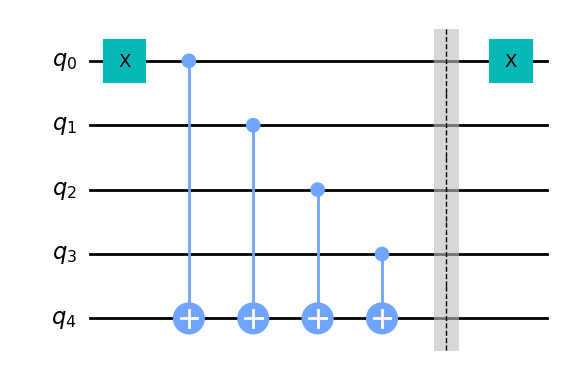

In [71]:
def deutsch_oracle(n, case='balanced'):
    qc = QuantumCircuit(n+1)

    if case == 'constant':

        #randomly set the output bit to either 0 or 1 since the input of a constant function has no effect on the output
        output = np.random.randint(2)
        if output == '1':
            qc.x(output)

    #if case is not constant, then default to a balanced oracle
    else:
        # Generate a random number with n bits
        number = random.getrandbits(n)
        # Convert the number to binary
        binary_string = format(number, '0b')

        #Now we have the binary string, we can use it as a key to place our X-gates.
        #For each qubit in our circuit, we place an X-gate if the corresponding digit in binary string is 1, or do nothing if the digit is 0.

        for qubit in range(len(binary_string)):
            if binary_string[qubit] == '1':
                qc.x(qubit)

        # Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:
        for qubit in range(n):
            qc.cx(qubit, n)

        # we can optionally apply a barrier to show the boundaries between various components of the circuit
        qc.barrier()

        # Next, we reapply the final X-gates to the same bit value as before
        for qubit in range(len(binary_string)):
            if binary_string[qubit] == '1':
                qc.x(qubit)

    # qc.draw()
    # qc_gate = qc.to_gate()
    # qc_gate.name = 'Oracle'

    return (qc)

qc_gate = deutsch_oracle(4)
qc_gate.draw()

    Experiment with it by running it severally to generate differnt circuits. The figure above was a result of the blanced oracle generated from a random bit string.

## Implementing the algorithm with the obtained Oracle:

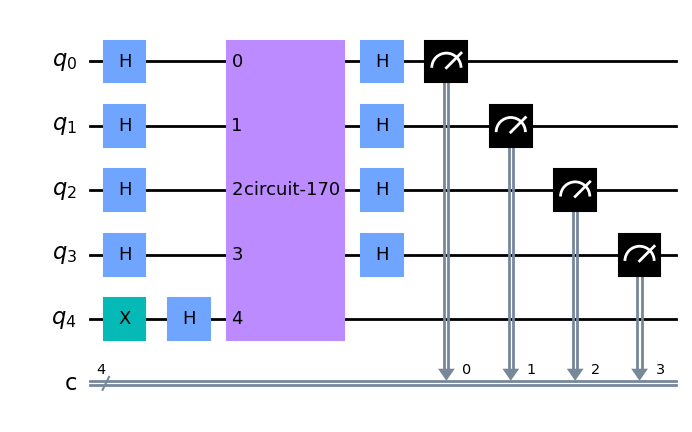

In [76]:
def dj_algorithm(Oracle, n):
    qc = QuantumCircuit(n+1, n)

    # Put output qubit in state |-> superposition state
    qc.x(n)
    qc.h(n)

    #Apply H gate
    for qubit in range(n):
        qc.h(qubit)

    #Aplly Oracle
    qc.append(Oracle, range(n+1))

    #Apply H-gate
    for qubit in range(n):
        qc.h(qubit)

    #Measure
    for i in range(n):
        qc.measure(i, i)

    return qc

dj_circuit = dj_algorithm(qc_gate, 4)
dj_circuit.draw()

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

In [ ]:

transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [ ]:
binary_str = "0101"
balanced_oracle = balanced_oracle(4, binary_str)
balanced_oracle.draw()

cnot_oracle = apply_not_gate(4, balanced_oracle, binary_str)

cnot_oracle.draw()

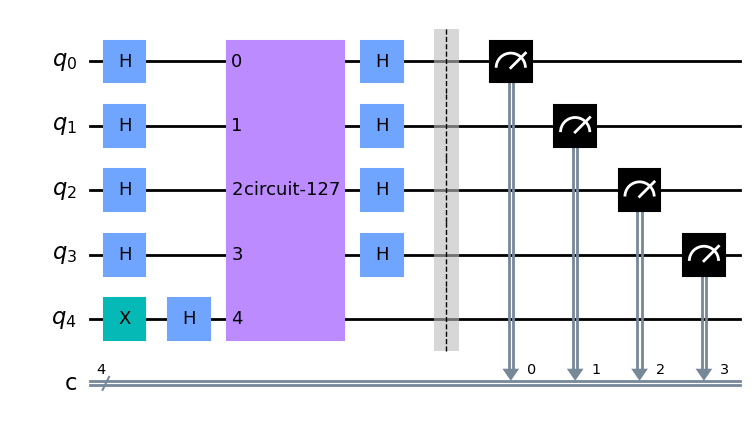

In [81]:
def dejos_alg(n, oracle):
    qc = QuantumCircuit(n+1, n)
    
    # Apply H-gates
    for qubit in range(n):
        qc.h(qubit)
        
    # Put output qubit in state |->
    qc.x(n)
    qc.h(n)
    
    # Add oracle
    qc.append(oracle, range(n+1))
    
    # Repeat H-gates
    for qubit in range(n):
        qc.h(qubit)
        
    qc.barrier()
    
    # Measure
    for i in range(n):
        qc.measure(i, i)
        
    return qc

qc = dejos_alg(4, cnot_oracle)
qc.draw()

### Reference:

https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

http://einsteinrelativelyeasy.com/index.php/quantum-mechanics/154-hadamard-gate-on-multiple-qubits